  
  
###**Acurácia, precisão, sensibilidade, especificidade e F1-score são métricas fundamentais para avaliar o desempenho de modelos de classificação em Machine Learning.**

Essas métricas são fundamentais para avaliar a qualidade de um modelo de classificação em machine learning, medindo diferentes aspectos do desempenho baseado em erros e acertos nas previsões em relação às classes reais.
  
  
  
### Conceitos iniciais: VP, VN, FP e FN    
Para entender as métricas, é importante conhecer os termos da matriz de confusão:  
- **Verdadeiro Positivo (VP)**: Quando o modelo prevê a classe positiva corretamente.    
- **Verdadeiro Negativo (VN)**: Quando o modelo prevê a classe negativa corretamente.    
- **Falso Positivo (FP)**: Quando o modelo prevê positivo, mas o correto é negativo.    
- **Falso Negativo (FN)**: Quando o modelo prevê negativo, mas o correto é positivo.    
    
### Acurácia    
É a proporção de acertos gerais do modelo. Mede o percentual de previsões corretas (positivas e negativas) em relação ao total de previsões.  

Indicada para problemas com classes balanceadas, ela pode ser enganosa em conjuntos desbalanceados.  
### Precisão    
Avalia, entre todas as previsões feitas como positivas, quantas estavam corretas. Ou seja, mede a confiança nas previsões positivas do modelo.  

Importante quando falsos positivos são problemáticos, como em diagnósticos médicos para evitar alarmes falsos.  
### Sensibilidade (Recall)    
Também chamada de revocação, mede a capacidade do modelo em identificar corretamente as verdadeiras instâncias positivas, ou seja, de todas as ocorrências reais da classe positiva, quantas foram encontradas.  

Vital quando falsos negativos são mais críticos, por exemplo, para detectar todos os casos de uma doença.  
### Especificidade    
Mede a capacidade do modelo de identificar corretamente os verdadeiros negativos, ou seja, quantas vezes o modelo acertou ao prever a classe negativa.  
   
É a média harmônica entre precisão e sensibilidade (recall), equilibrando as duas métricas para quando ambos os erros, falsos positivos e falsos negativos, são importantes.  

A média harmônica é utilizada pois penaliza severamente a baixa pontuação em qualquer uma das duas métricas, refletindo melhor o equilíbrio entre elas do que a média aritmética.  

### F1-Score    
É a média harmônica entre precisão e sensibilidade (recall), equilibrando as duas métricas para quando ambos os erros, falsos positivos e falsos negativos, são importantes.  

A média harmônica é utilizada pois penaliza severamente a baixa pontuação em qualquer uma das duas métricas, refletindo melhor o equilíbrio entre elas do que a média aritmética.  

### Por que usar cada métrica?    
- **Acurácia** é boa para uma visão geral, especialmente com dados balanceados.    
- **Precisão** é importante quando os falsos positivos são mais custosos.    
- **Sensibilidade** é escolhida quando falsos negativos são críticos, como em diagnósticos para prevenção de riscos graves.    
- **Especificidade** serve para entender o quão bem o modelo reconhece corretamente a classe negativa.    
- **F1-Score** é preferido quando se quer uma métrica única que leve em conta equilíbrio entre precisão e sensibilidade, especialmente em dados desbalanceados.    
  
  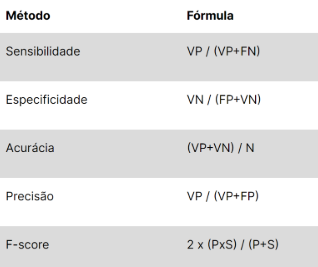

Essa compreensão ajuda na escolha da métrica mais adequada ao problema, garantindo que o modelo construa previsões confiáveis e alinhadas aos objetivos do negócio ou pesquisa.  

In [ ]:
#Carregar bibliotecas e dataset para treinamento
#dataset bem conhecido, números escritos para classificação, principal intuíto é calcular as métricas
from tensorflow.keras import datasets, layers, models
from tensorflow import math, argmax
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%load_ext tensorboard
logdir = 'log'
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [66]:
#redimensionando as imagens
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0
classes = [0,1,2,3,4,5,6,7,8,9]

In [6]:
#Treinamento do modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8897 - loss: 0.3574 - val_accuracy: 0.9853 - val_loss: 0.0474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9841 - loss: 0.0528 - val_accuracy: 0.9890 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9899 - loss: 0.0349 - val_accuracy: 0.9879 - val_loss: 0.0350
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9880 - val_loss: 0.0351
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9895 - val_loss: 0.0346


In [29]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


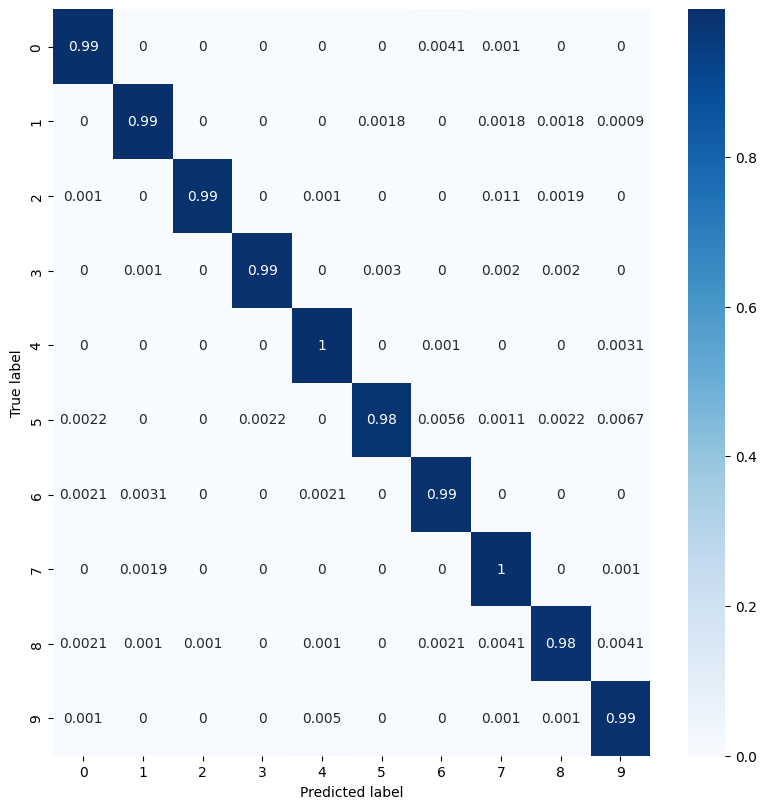

In [55]:
#Montando matriz de confusão
predicted_labels = argmax(y_pred, axis=1)
con_mat = math.confusion_matrix(labels=y_true,predictions=predicted_labels).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
#Resultado das métricas
tp_total = 0
fp_total = 0
fn_total = 0
tn_total = 0

for number_class in con_mat_df.index:
  tp = con_mat_df.loc[number_class, number_class]
  fp = con_mat_df.loc[:, number_class].sum() - tp
  fn = con_mat_df.loc[number_class, :].sum() - tp
  tn = con_mat_df.values.sum() - (tp + fp + fn)

  tp_total += tp
  fp_total += fp
  fn_total += fn
  tn_total += tn
  accuracy = (tn+tp)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  sensitivity = tp/(tp+fn)
  f1_score = 2 * precision * sensitivity/(precision + sensitivity)
  print(f"Class {number_class}:")
  print(f"  True Positives  (TP): {tp:.4f}")
  print(f"  False Positives (FP): {fp:.4f}")
  print(f"  False Negatives (FN): {fn:.4f}")
  print(f"  True Negatives  (TN): {tn:.4f}\n")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Sensitivity: {sensitivity:.4f}")
  print(f"  F1 Score: {f1_score:.4f}\n")

print(f"Total:")
print(f"  True Positives  (TP): {tp_total:.4f}")
print(f"  False Positives (FP): {fp_total:.4f}")
print(f"  False Negatives (FN): {fn_total:.4f}")
print(f"  True Negatives  (TN): {tn_total:.4f}\n")
print(f"  Accuracy: {((tn_total+tp_total)/(tp_total+tn_total+fp_total+fn_total)):4f}")
print(f"  Precision: {(tp_total/(tp_total+fp_total)):4f}")
print(f"  Sensitivity: {(tp_total/(tp_total+fn_total)):4f}")
print(f"  F1 Score: {(2 * tp_total/(2*tp_total+fp_total+fn_total)):4f}")

Class 0:
  True Positives  (TP): 0.9949
  False Positives (FP): 0.0084
  False Negatives (FN): 0.0051
  True Negatives  (TN): 8.9918

  Accuracy: 0.9987
  Precision: 0.9916
  Sensitivity: 0.9949
  F1 Score: 0.9933

Class 1:
  True Positives  (TP): 0.9938
  False Positives (FP): 0.0070
  False Negatives (FN): 0.0063
  True Negatives  (TN): 8.9931

  Accuracy: 0.9987
  Precision: 0.9930
  Sensitivity: 0.9937
  F1 Score: 0.9934

Class 2:
  True Positives  (TP): 0.9855
  False Positives (FP): 0.0010
  False Negatives (FN): 0.0146
  True Negatives  (TN): 8.9991

  Accuracy: 0.9984
  Precision: 0.9990
  Sensitivity: 0.9854
  F1 Score: 0.9921

Class 3:
  True Positives  (TP): 0.9921
  False Positives (FP): 0.0022
  False Negatives (FN): 0.0080
  True Negatives  (TN): 8.9979

  Accuracy: 0.9990
  Precision: 0.9978
  Sensitivity: 0.9920
  F1 Score: 0.9949

Class 4:
  True Positives  (TP): 0.9959
  False Positives (FP): 0.0091
  False Negatives (FN): 0.0041
  True Negatives  (TN): 8.9911

  Accu